<a href="https://colab.research.google.com/github/ekanshi258/optimization-algos/blob/master/structural_design_3_ga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymoo

This experiment is based on the following paper:  
_Solving structural engineering design optimization problems using an artificial bee colony algorithm_: https://www.aimsciences.org/article/doi/10.3934/jimo.2014.10.777

I will be using the Genetic Algo to solve the same problem as given in the paper.


In [2]:
import numpy as np
from pymoo.model.problem import FunctionalProblem
from pymoo.algorithms.so_genetic_algorithm import GA

from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination
from pymoo.optimize import minimize

The paper states 3 structural design problems. 

Problem 3:  
**Tension/Compression String Design. (Section 4.2.3).**


---


Objective functions:  
```
Minimize f(X) = (x3 + 2) * x2 * x1^2
Such that:
g1(X) = 1 − (x2^3 * x3)/(71785 * x1^4) <= 0
g2(X) = (4*x2^2 − x1*x2)/12566*(x2*x1^3 − x1^4) + 1/(5108 * x1^2) − 1 <= 0
g3(X) = 1 − (140.45 * x1)/(x2^2 * x3) <= 0
g4(X) = (x1 + x2)/(1.5) − 1 <= 0

Bounds:
0.05 <= x1 <= 2 ; 0.25 <= x2 <= 1.3 ; 2 <= x3 <= 15
```

> Minimizing the weight of a tension/compression spring subject to constraints on minimum deflection, shear stress, surge frequency, limits on outside diameter and on design
variables. The design variables are the mean coil diameter(x1), the wire diameter (x2) and the number of active coil (x3).

In [3]:
#objective functions
objs = [
    lambda x: (x[2] + 2) * x[1] * x[0]**2,
]

# Contraint equations
constr_ieq = [
    lambda x: 1 - (x[1]**3 * x[2])/(71785 * x[0]**4),
    lambda x: (4*x[1]**2 - x[0]*x[1])/(12566*(x[1] * x[0]**3 - x[0]**4)) + 1/(5108 * x[0]**2) - 1,
    lambda x: 1 - (140.45 * x[0])/(x[1]**2 * x[2]),
    lambda x: (x[0] + x[1])/(1.5) - 1
]

# value bounds
lower_bound = np.array([0.05, 0.25, 2])
upper_bound = np.array([2, 1.3, 15])

# initialising problem
problem = FunctionalProblem(3, objs, constr_ieq=constr_ieq, xl=lower_bound, xu=upper_bound)

Starting GA:

In [4]:
algorithm = GA(
    pop_size=1000,
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True)

termination = get_termination("n_gen", 280)

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     fopt     |     favg    
    1 |    1000 |  0.00000E+00 |  1.269475766 |  0.021596037 |  0.088538159
    2 |    2000 |  0.00000E+00 |  0.920361207 |  0.019084181 |  0.086673264
    3 |    3000 |  0.00000E+00 |  0.778847993 |  0.019084181 |  0.084273442
    4 |    4000 |  0.00000E+00 |  0.454351616 |  0.016894179 |  0.075340555
    5 |    5000 |  0.00000E+00 |  0.120613566 |  0.016894179 |  0.075741658
    6 |    6000 |  0.00000E+00 |  0.006898437 |  0.016894179 |  0.072216348
    7 |    7000 |  0.00000E+00 |  0.00000E+00 |  0.016894179 |  0.046411722
    8 |    8000 |  0.00000E+00 |  0.00000E+00 |  0.015904952 |  0.034586141
    9 |    9000 |  0.00000E+00 |  0.00000E+00 |  0.015509800 |  0.028870864
   10 |   10000 |  0.00000E+00 |  0.00000E+00 |  0.015212556 |  0.025427752
   11 |   11000 |  0.00000E+00 |  0.00000E+00 |  0.014235727 |  0.022802417
   12 |   12000 |  0.00000E+00 |  0.00000E+00 |  0.013254573 |  0.020926620
   13 |   13

In [5]:
print("X: ", res.X)
print("Obj: ", res.F)
print("Constraints: ", res.G)
print("Execution time: ", res.exec_time)

X:  [ 0.05218557  0.36877989 10.61541748]
Obj:  [0.0126698]
Constraints:  [0. 0. 0. 0.]
Execution time:  49.111677169799805


Covergence:



```
x-axis: number of function evaluations
y-axis: optimum objective value
```


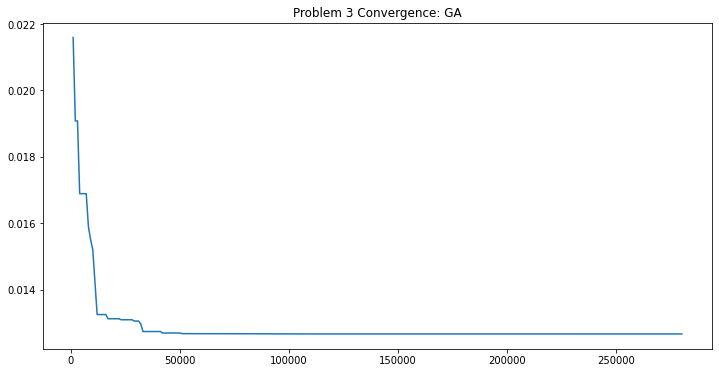

In [7]:
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])
plt.figure(figsize=(12,6))
plt.title("Problem 3 Convergence: GA")
plt.plot(n_evals, opt, "-")
plt.show()

Convergence with logarithmic scale Y-Axis

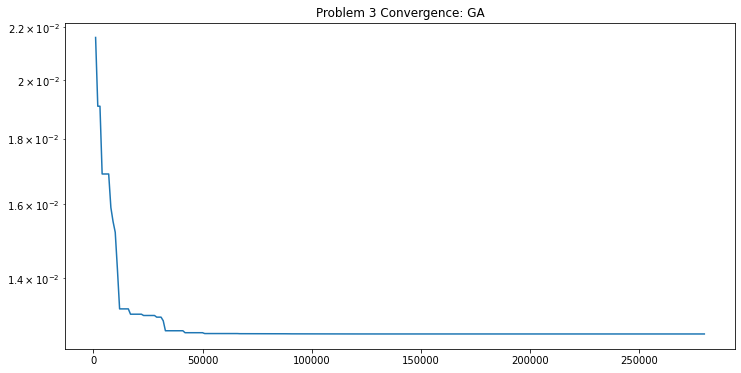

In [8]:
n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])
plt.figure(figsize=(12,6))
plt.title("Problem 3 Convergence: GA")
plt.plot(n_evals, opt, "-")
plt.yscale("log")
plt.show()